In [35]:
import re
import glob
import json
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from graphviz import Digraph
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from heapq import nlargest

In [2]:
files = glob.glob("dados/*.json")

In [26]:
graphs = dict()
for filename in files:
    DG = nx.DiGraph()
    with open(filename, 'r', encoding="utf8") as f: 
        data = json.load(f)
        for tweet in data:
            DG.add_node(tweet)
            if(data[tweet]['replie_to'] is not None):
                DG.add_node(data[tweet]['replie_to'])
                DG.add_edge(tweet,data[tweet]['replie_to'])
            for attr in data[tweet]:
                DG.node[tweet][attr] = data[tweet][attr]
    graphs[filename] = DG

In [7]:
g = Digraph('G')
g.attr(size='20')
with open("dados/replies_238717783007977473.json", 'r', encoding="utf8") as f:
    data = json.load(f)
g.attr('node')
for key in data:
    score = data[key]['sentiment']
    if(score <= -0.8):
        g.node(key, color='#67001F', style="filled")
    elif(score > -0.8 and score <= -0.6):
        g.node(key, color='#B2172B', style="filled")
    elif(score > -0.6 and score <= -0.4):
        g.node(key, color='#D6604D', style="filled")
    elif(score > -0.4 and score <= -0.2):
        g.node(key, color='#F4A582', style="filled")
    elif(score > -0.2 and score < 0):
        g.node(key, color='#FDDBC7', style="filled")
    elif(score == 0.0):
        g.node(key, color='#F8F8F8', style="filled")
    elif(score > 0.0 and score <= 0.2):
        g.node(key, color='#D1E5F0', style="filled")
    elif(score > 0.2 and score <= 0.4):
        g.node(key, color='#92C5DF', style="filled")
    elif(score > 0.4 and score <= 0.6):
        g.node(key, color='#4393C3', style="filled")
    elif(score > 0.6 and score <= 0.8):
        g.node(key, color='#2166AC', style="filled")
    elif(score > 0.8):
        g.node(key, color='#053061', style="filled")
for key in data:
    if(key is not None):
        if(data[key]["replie_to"] is not None):
            g.edge(data[key]["replie_to"], key)
g.view()

'G.gv.pdf'

In [28]:
quotes = glob.glob("dados/replies_238717783007977473_*.json")

In [29]:
dist_sentiment = list()
for each in quotes:
    aux = list()
    for item in graphs[each]:
        aux.append(graphs[each].nodes[item]['sentiment'])
    dist_sentiment.append(np.array(aux))

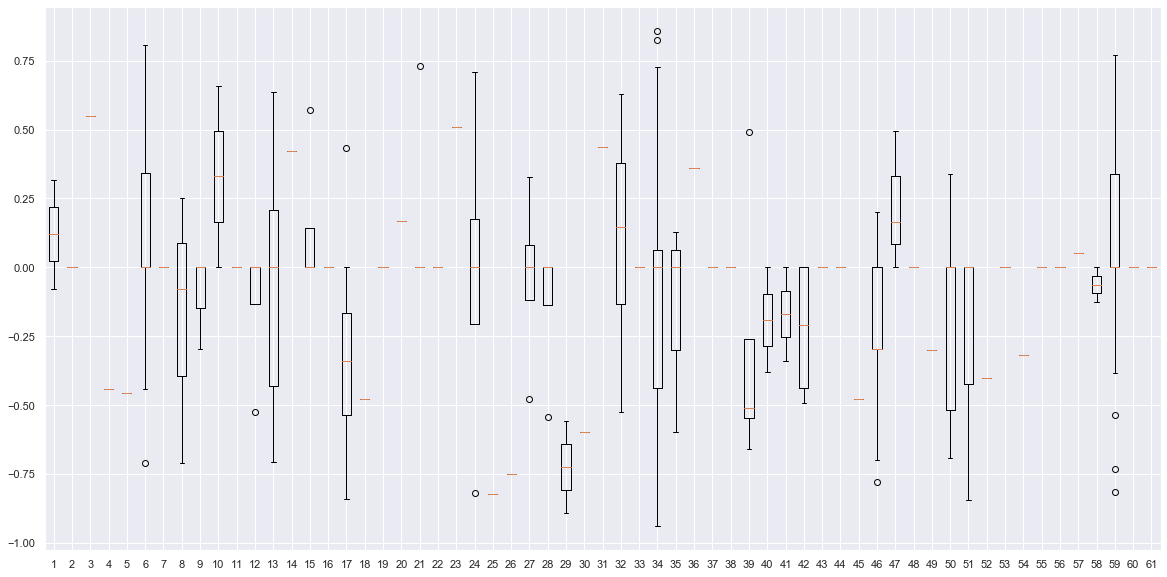

In [30]:
# Create a figure instance
fig = plt.figure(1, figsize=(20, 10))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(dist_sentiment)

# Save the figure
_= plt.savefig("dist_sentiment.png", quality = 95, orientation='portrait')

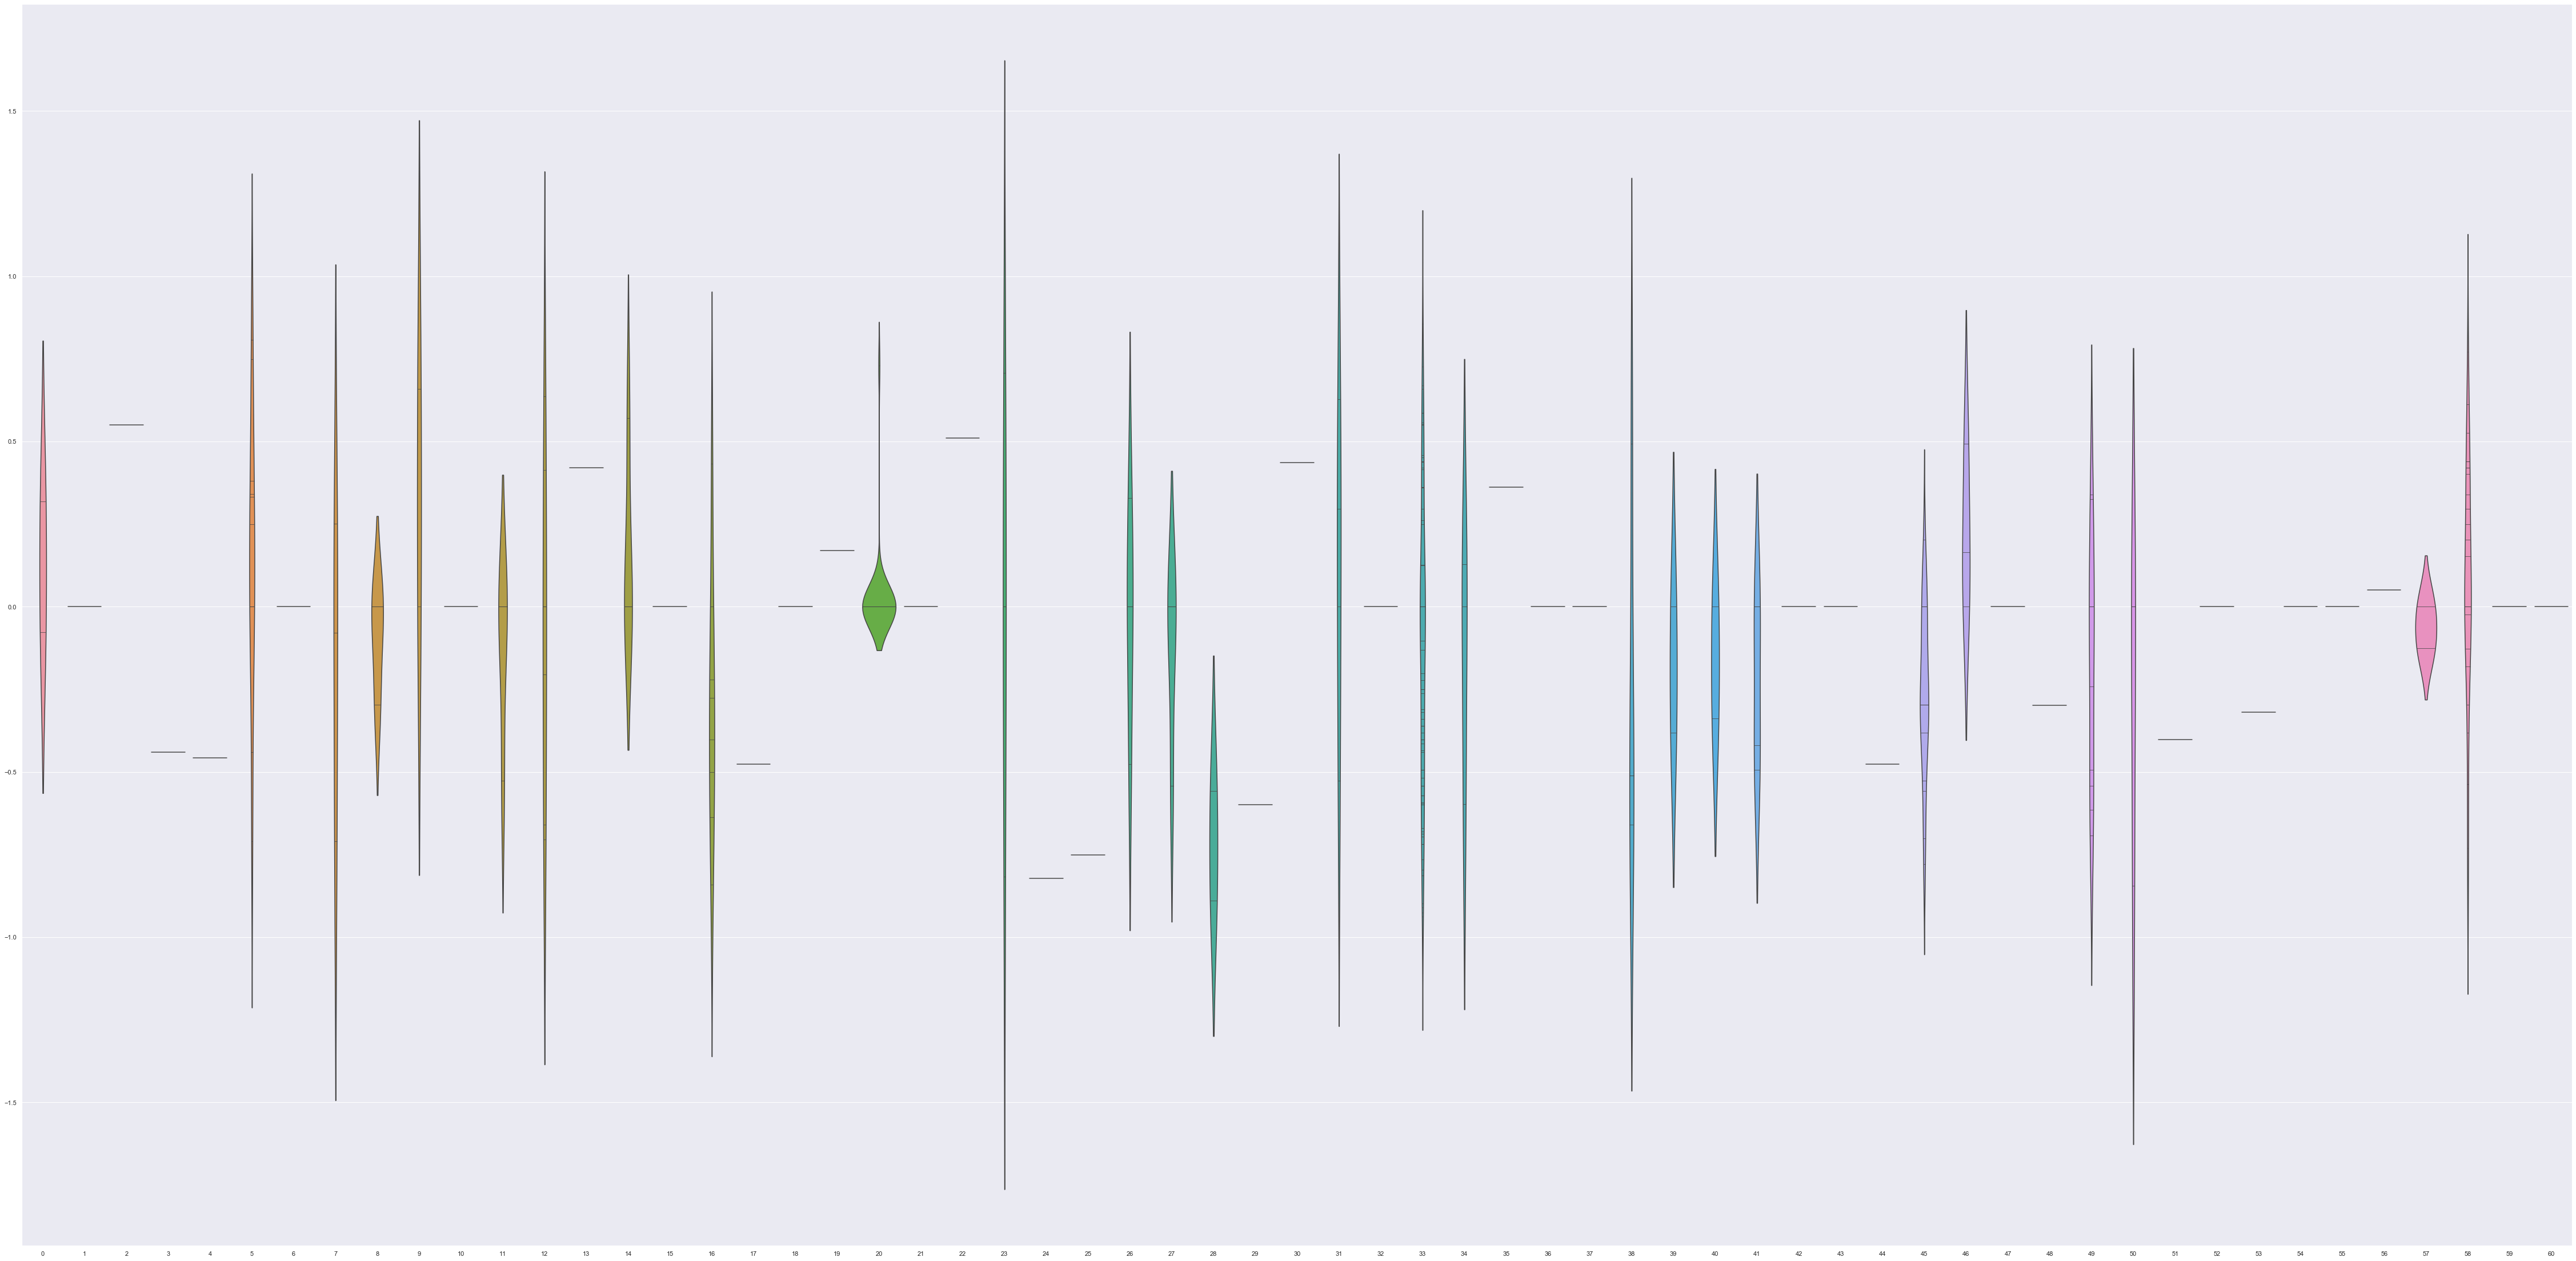

In [31]:
sns.set(rc={'figure.figsize':(80,40)})
ax = sns.violinplot(data=dist_sentimentposi, inner="stick")

In [46]:
positives = list()
negatives = list()
for ds in dist_sentiment:
    k = int(len(ds)*0.6)
    if(k != 0):
        number = max(nlargest(k, ds))
    else:
        number = ds[0]
    if(number >= 0):
        positives.append(ds)
    else:
        negatives.append(ds)

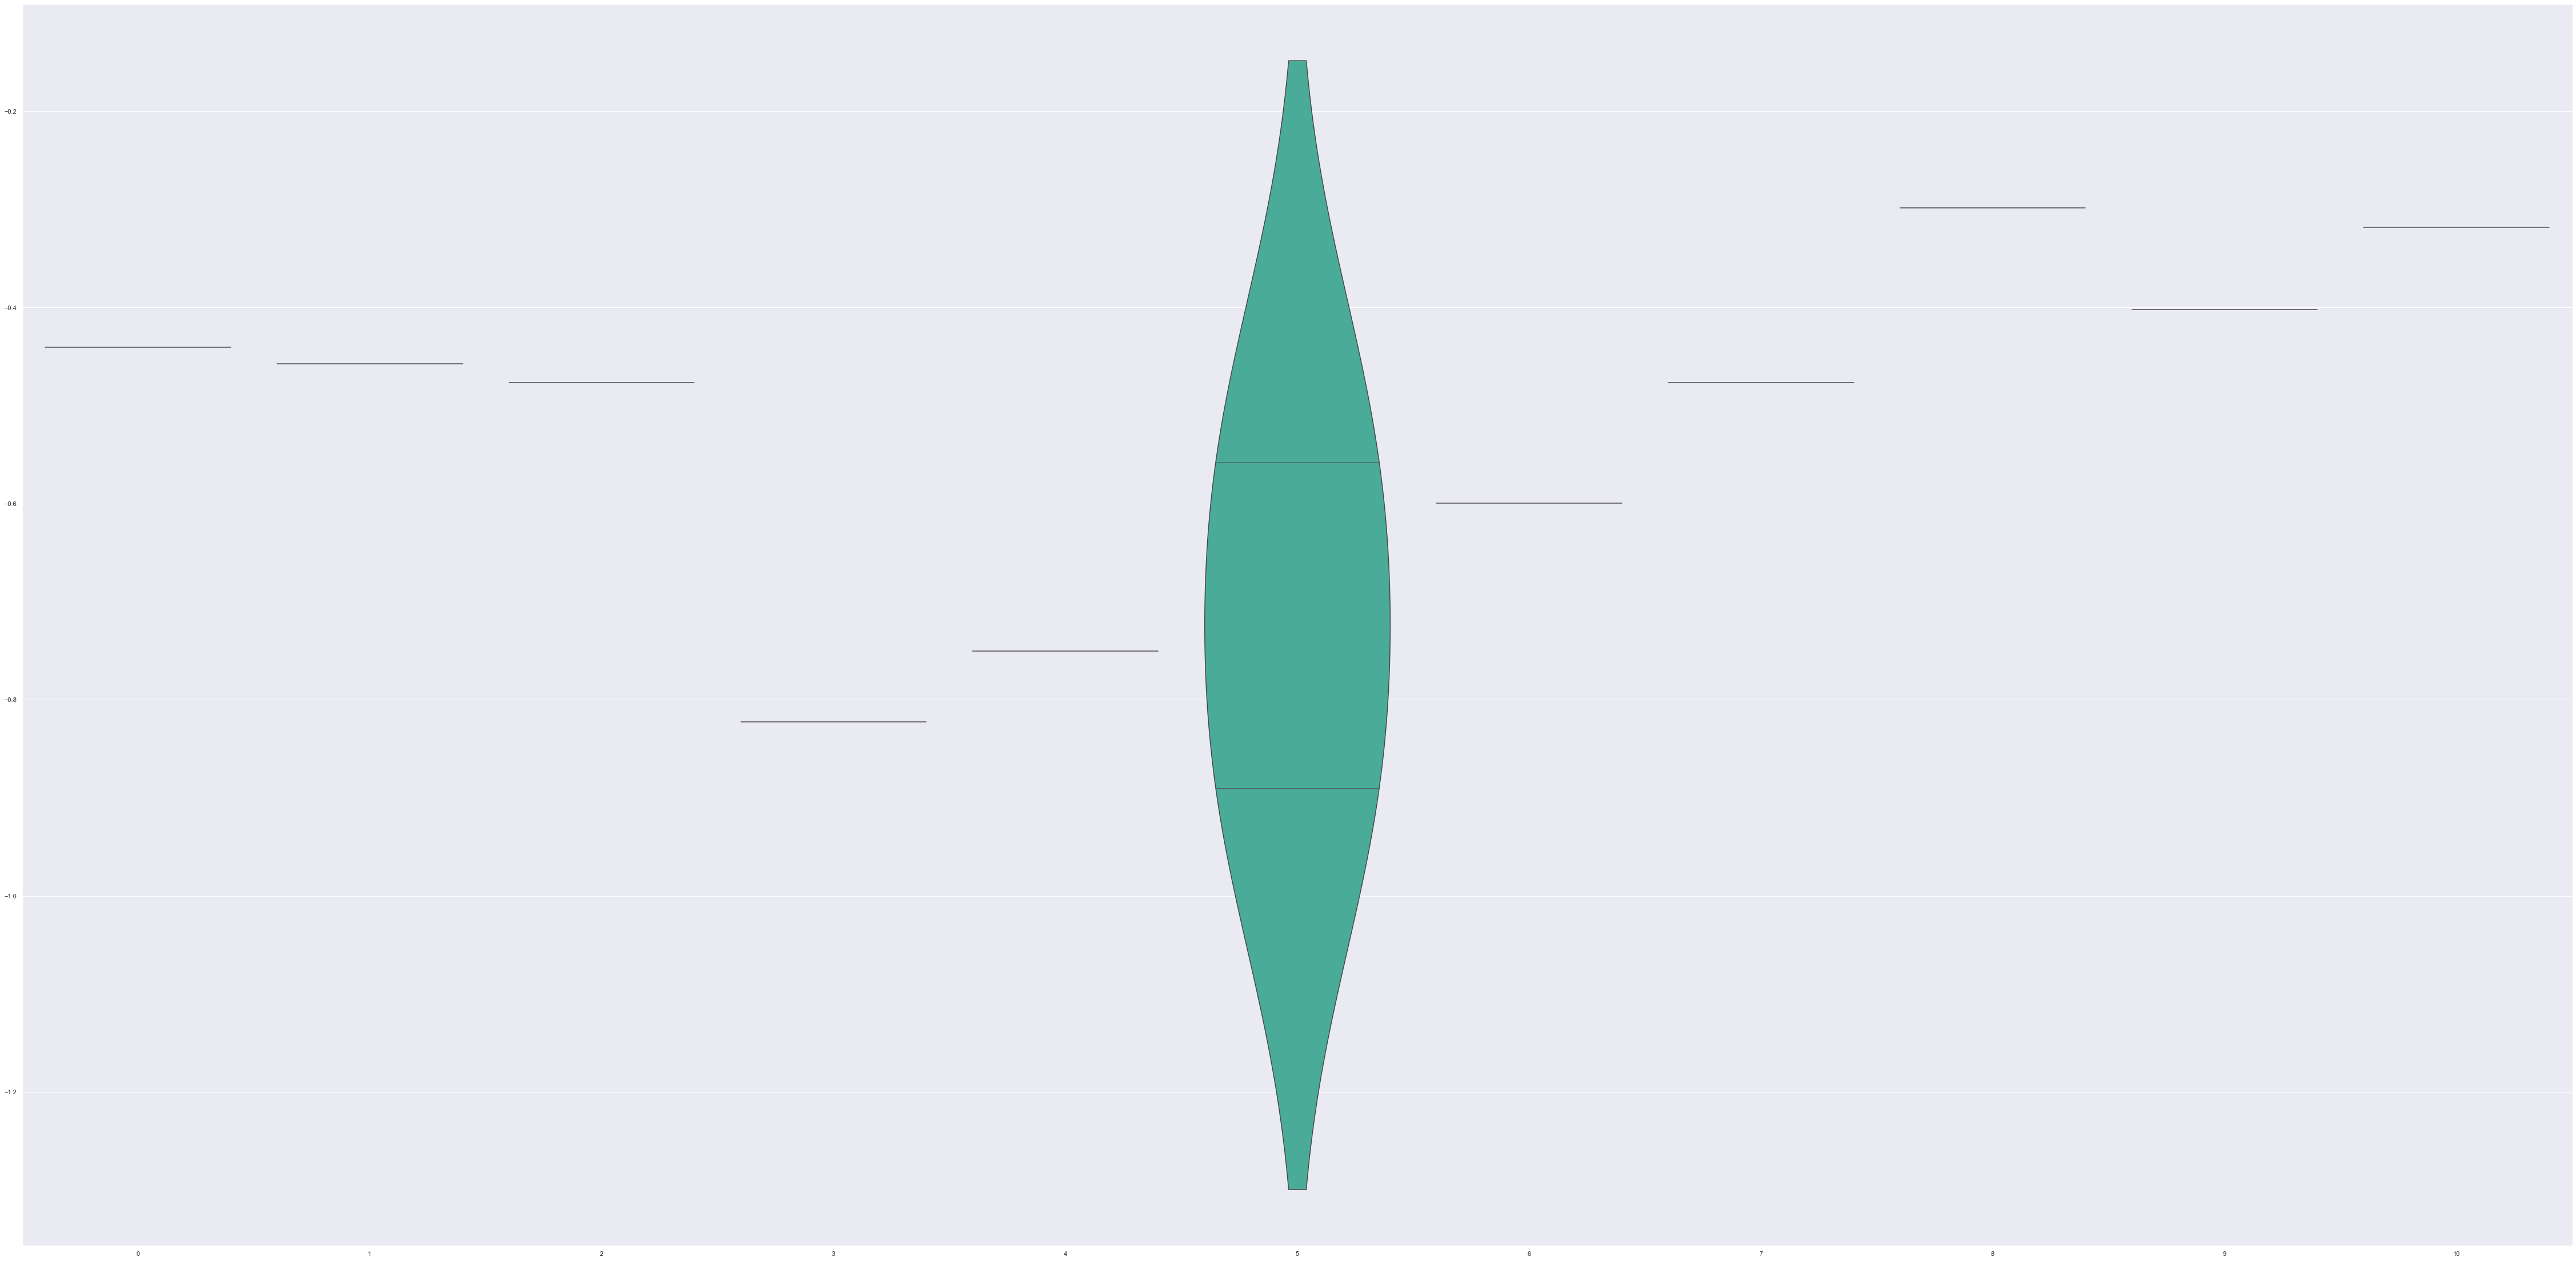

In [47]:
sns.set(rc={'figure.figsize':(80,40)})
ax = sns.violinplot(data=negatives, inner="stick")